In [1]:
import json
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [12]:
files= os.listdir('Searches')

searches = []
dates = []
for file in files:
    with open('Searches/%s'%(file)) as json_data:
        d = json.load(json_data)
    for i in range(len(d['event'])):
        for j in range(len((d['event'][i][u'query'][u'id']))):
            searches.append(d['event'][i][u'query'][u'query_text']) 
            dates.append(d['event'][i][u'query'][u'id'][j][u'timestamp_usec'])

dates = [datetime.datetime.fromtimestamp(int(i)/1000000).strftime('%Y-%m-%d %H:%M:%S') 
         for i in dates]
searches = [i.encode('utf-8') for i in searches]
print len(searches)

48621


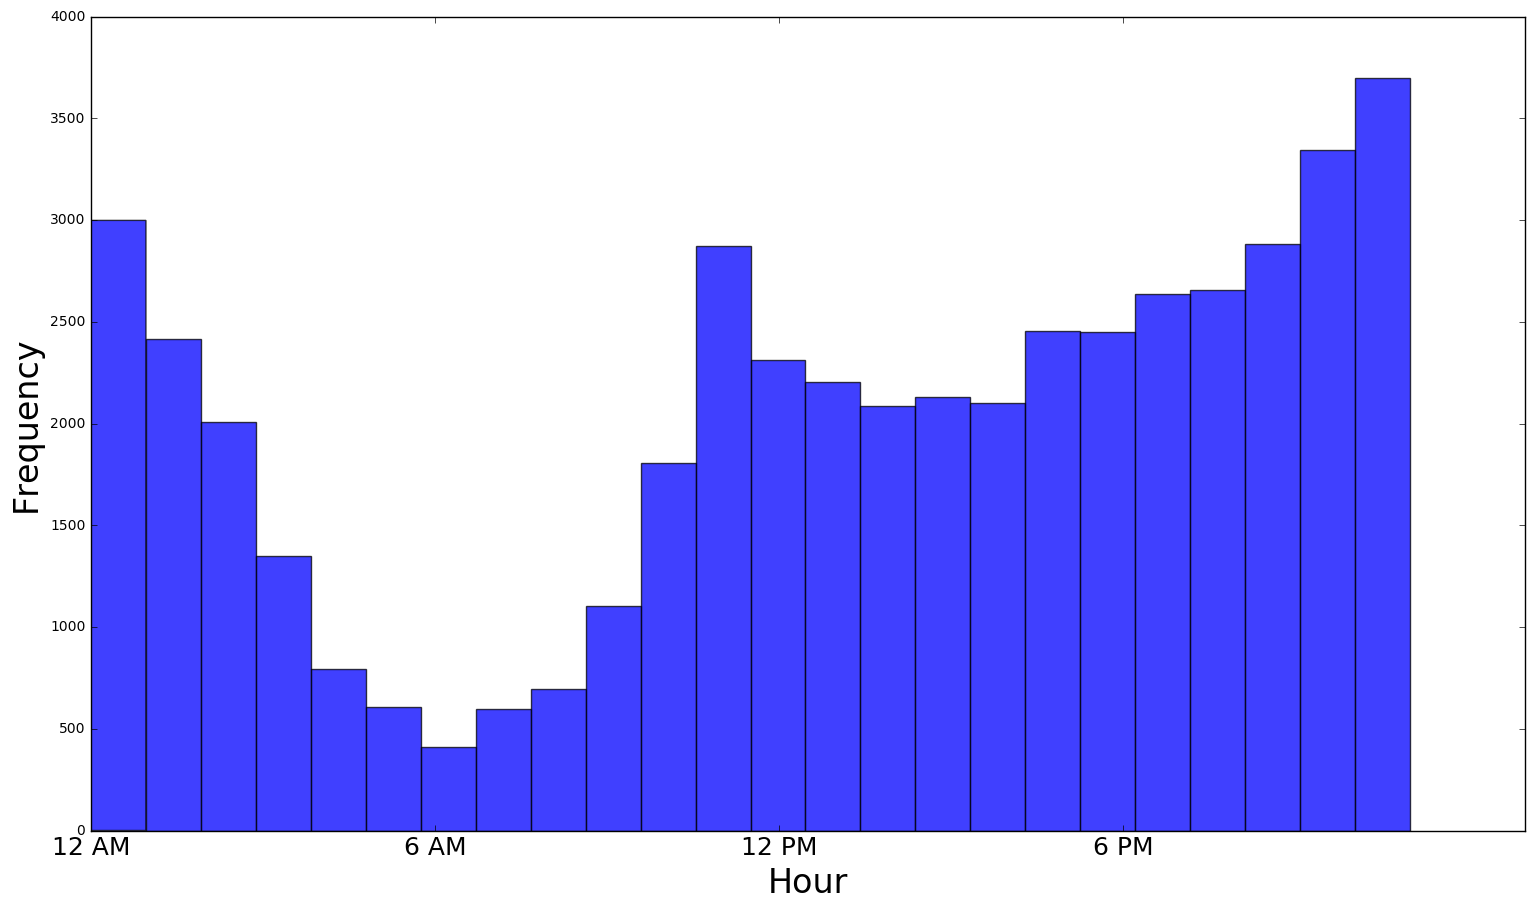

In [5]:
hours = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S').hour for i in dates]
n, bins, patches = plt.hist(hours, 24, facecolor='blue', alpha=0.75)
plt.xticks([0,6,12,18], ['12 AM','6 AM', '12 PM', '6 PM'], fontsize=18)
plt.xlabel('Hour', fontsize=24)
plt.ylabel('Frequency', fontsize=24)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

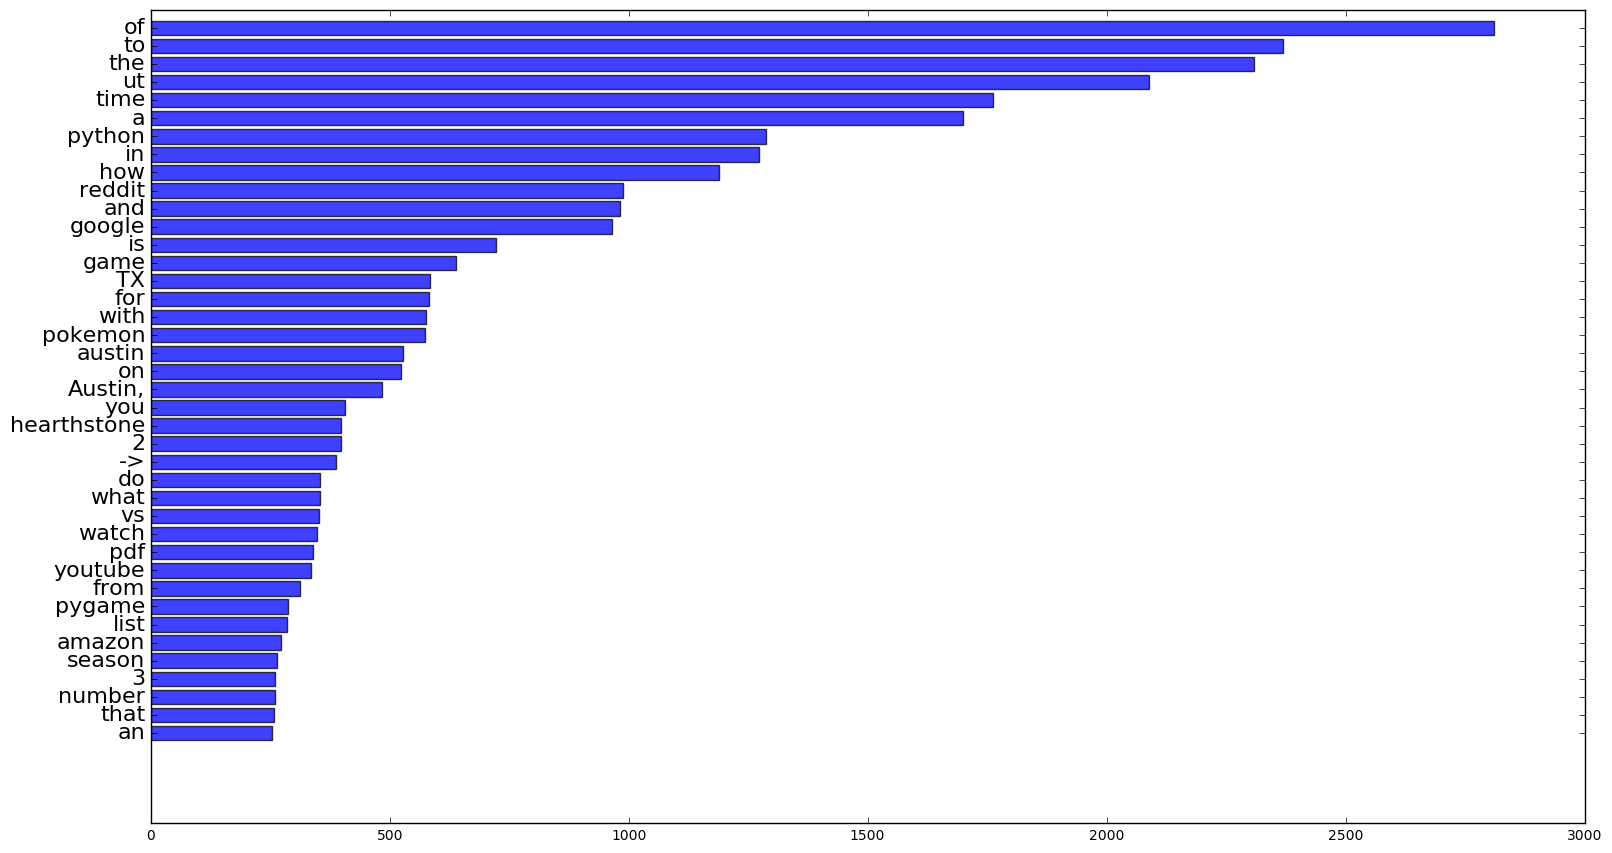

In [6]:

combo = ' '.join(searches)
freqs = Counter(combo.split())
top = freqs.most_common(40)

words = []
counts = []
for i in range(40):
    words.append(top[i][0])
    counts.append(top[i][1])

words.reverse()
counts.reverse()

plt.barh(range(40), counts, align='center', color='b', alpha=0.75)
plt.yticks(range(40), words, fontsize=16)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

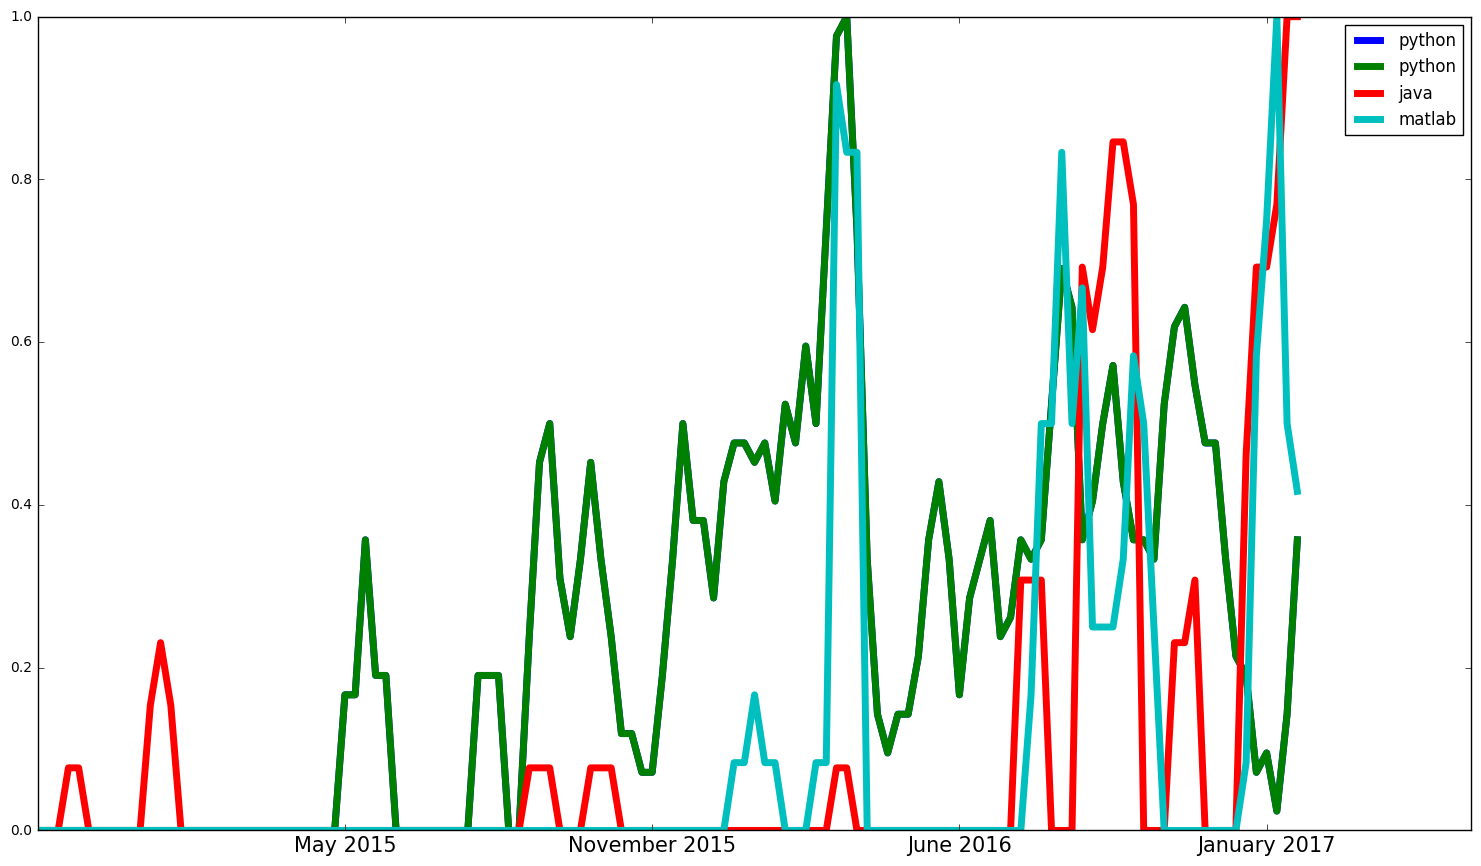

In [13]:
dt = datetime.datetime(2014, 10, 1)
end = datetime.datetime(2017, 3, 5)
step = datetime.timedelta(days=7)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

python_weeks = []
java_weeks = []
matlab_weeks = []

for i in range(len(result)-1):
    python_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('python'))))
    java_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('java'))))
    matlab_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('matlab'))))

term = len(python_weeks)-1

python_weeks_smooth = [(python_weeks[i] + python_weeks[i-1] +python_weeks[i+1])/3 for i in range(1, term)]
python_weeks_smooth_norm = [i/float(max(python_weeks_smooth)) for i in python_weeks_smooth]

matlab_weeks_smooth = [(matlab_weeks[i] + matlab_weeks[i-1] + matlab_weeks[i+1])/3 for i in range(1, term)]
matlab_weeks_smooth_norm = [i/float(max(matlab_weeks_smooth)) for i in matlab_weeks_smooth]

java_weeks_smooth = [(java_weeks[i] + java_weeks[i-1] + java_weeks[i+1])/3 for i in range(1, term)]
java_weeks_smooth_norm = [i/float(max(java_weeks_smooth)) for i in java_weeks_smooth]

plt.plot(range(term-1), python_weeks_smooth_norm, label='python', linewidth=5.0)
plt.plot(range(term-1), java_weeks_smooth_norm, label='java', linewidth=5.0)
plt.plot(range(term-1), matlab_weeks_smooth_norm, label='matlab', linewidth=5.0)
plt.xticks([30,60,90,120], ['May 2015','November 2015', 'June 2016', 'January 2017'], fontsize=15)
plt.legend()

plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

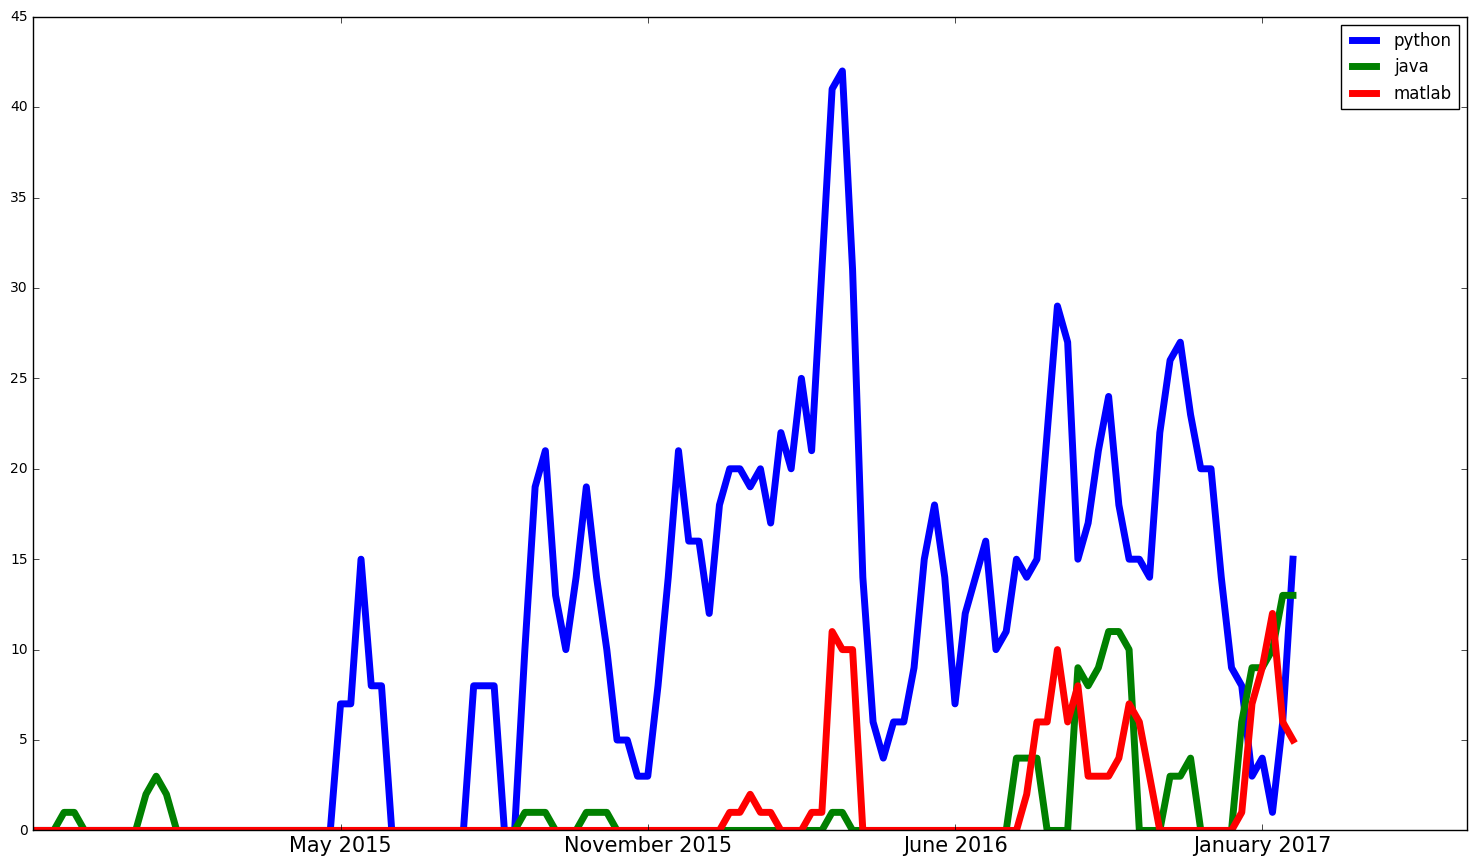

In [14]:
plt.plot(range(term-1), python_weeks_smooth, label='python', linewidth=5.0)
plt.plot(range(term-1), java_weeks_smooth, label='java', linewidth=5.0)
plt.plot(range(term-1), matlab_weeks_smooth, label='matlab', linewidth=5.0)
plt.xticks([30,60,90,120], ['May 2015','November 2015', 'June 2016', 'January 2017'], fontsize=15)
plt.legend()

plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

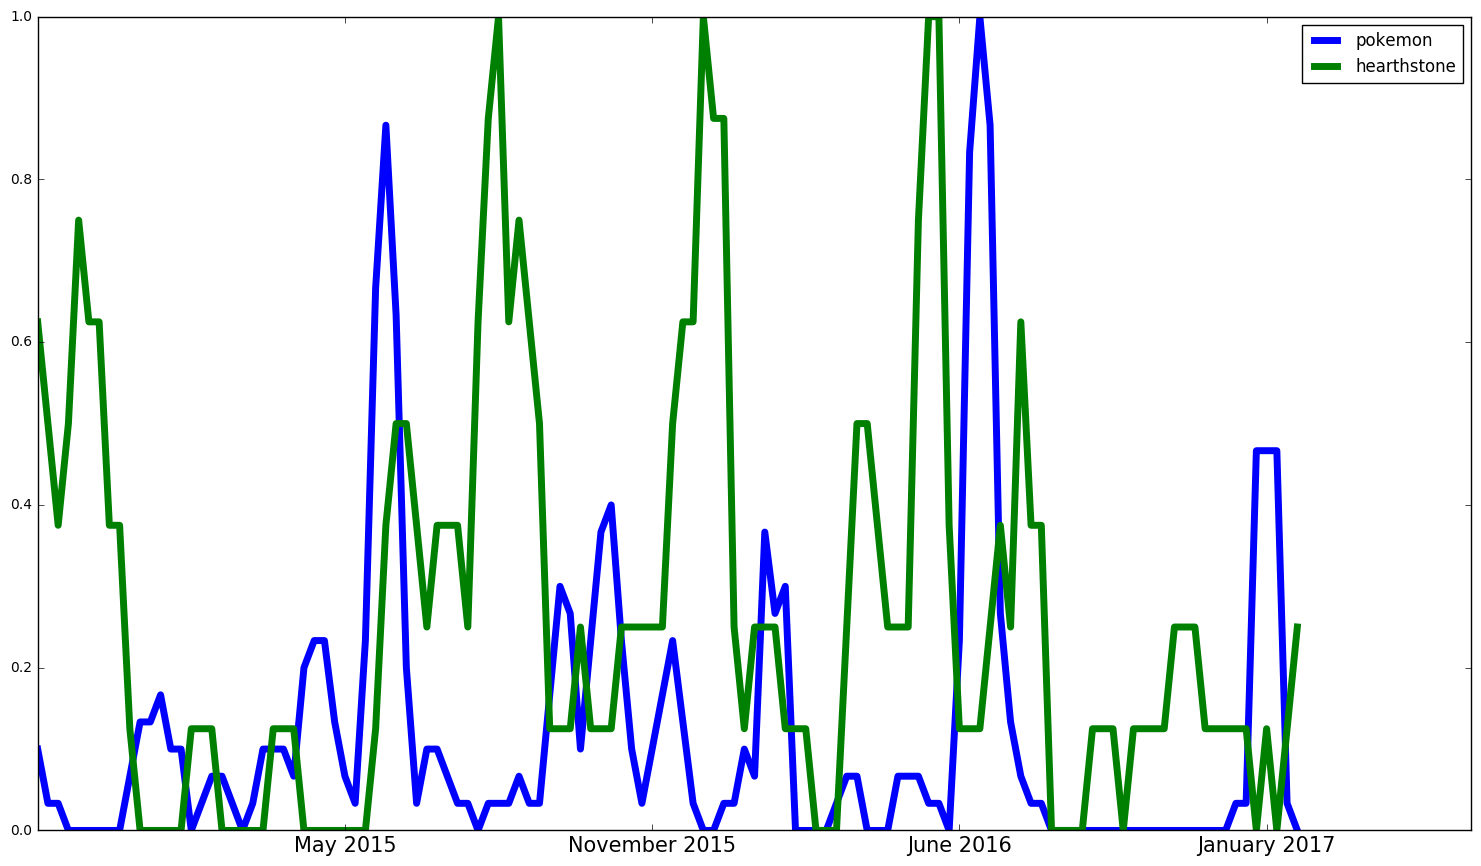

In [16]:
dt = datetime.datetime(2014, 10, 1)
end = datetime.datetime(2017, 3, 5)
step = datetime.timedelta(days=7)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

pokemon_weeks = []
hearthstone_weeks = []

for i in range(len(result)-1):
    pokemon_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('pokemon'))))
    hearthstone_weeks.append(sum((googled['time'] > result[i]) & 
              (googled['time'] < result[i+1]) &
              (googled['search'].str.contains('hearthstone'))))

term = len(pokemon_weeks)-1

pokemon_weeks_smooth = [(pokemon_weeks[i] + pokemon_weeks[i-1] +pokemon_weeks[i+1])/3 for i in range(1, term)]
pokemon_weeks_smooth_norm = [i/float(max(pokemon_weeks_smooth)) for i in pokemon_weeks_smooth]

hearthstone_weeks_smooth = [(hearthstone_weeks[i] + hearthstone_weeks[i-1] + hearthstone_weeks[i+1])/3 for i in range(1, term)]
hearthstone_weeks_smooth_norm = [i/float(max(hearthstone_weeks_smooth)) for i in hearthstone_weeks_smooth]

plt.plot(range(term-1), pokemon_weeks_smooth_norm, label='pokemon', linewidth=5.0)
plt.plot(range(term-1), hearthstone_weeks_smooth_norm, label='hearthstone', linewidth=5.0)
plt.xticks([30,60,90,120], ['May 2015','November 2015', 'June 2016', 'January 2017'], fontsize=15)
plt.legend()

plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()

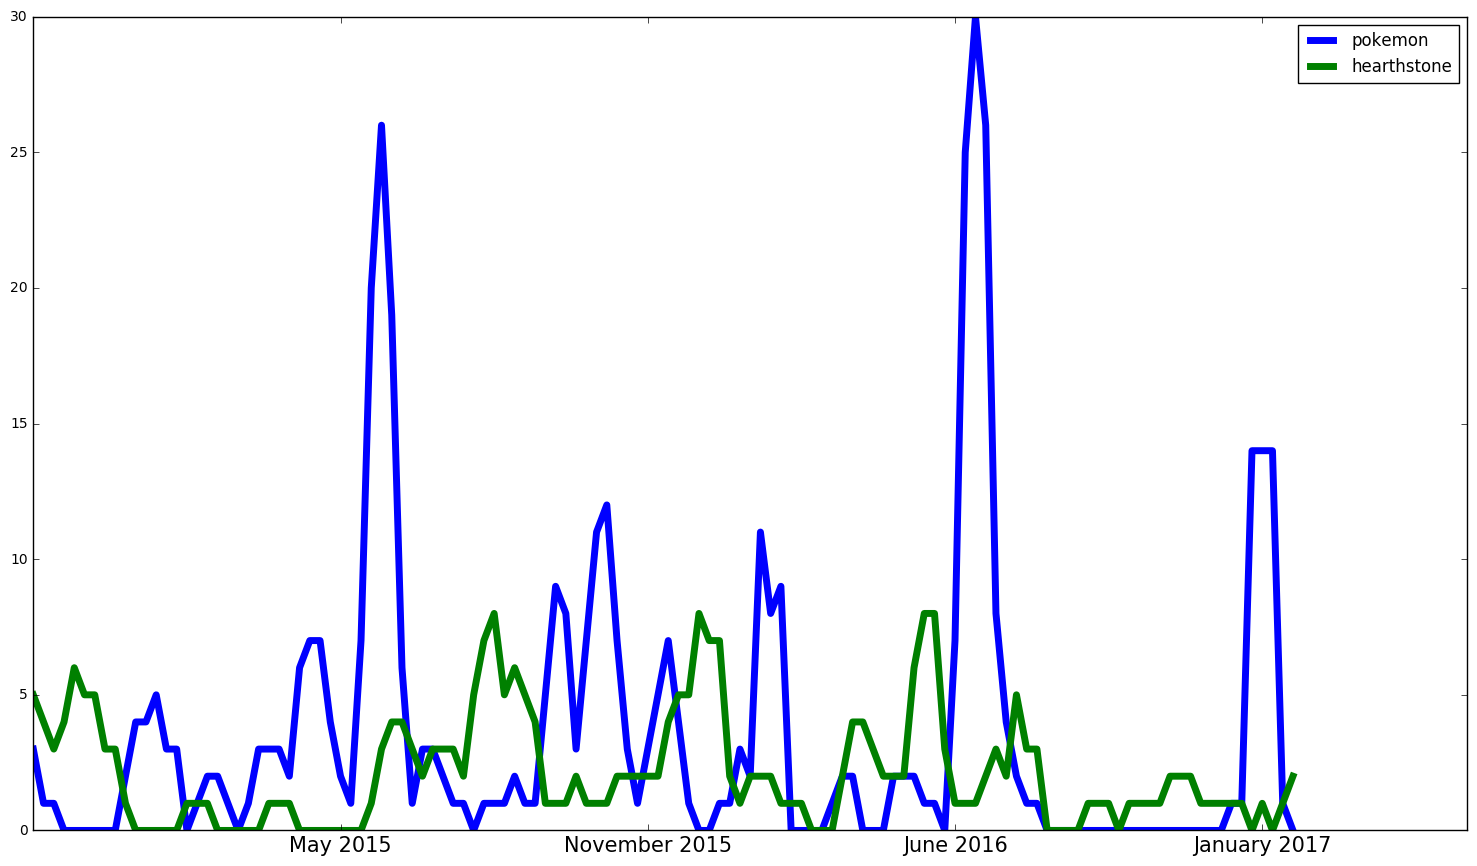

In [17]:
plt.plot(range(term-1), pokemon_weeks_smooth, label='pokemon', linewidth=5.0)
plt.plot(range(term-1), hearthstone_weeks_smooth, label='hearthstone', linewidth=5.0)
plt.xticks([30,60,90,120], ['May 2015','November 2015', 'June 2016', 'January 2017'], fontsize=15)
plt.legend()

plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.show()